In [35]:
library(tidyverse)
library(tidyr)
library(slider)
library(glmnet)
library(plotly)
library(Matrix)
require(methods)

In [36]:
METHOD = "LASSO"
standardization = "TRUE"
sum_control_ATAC_bin_rm = readRDS("../data/data_rds_format/sum_control_ATAC_bin_rm_normalized_sliding_mean.rds")

In [37]:
if (METHOD == "LASSO"){
    alpha_method = 1
    } else if (METHOD == "RIDGE"){
    alpha_method = 0}


In [38]:
head(sum_control_ATAC_bin_rm)

X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X692,X693,X694,X695,X696,X697,X698,X699,X700,ATAC_val
1.449941e-06,1.491368e-06,1.522438e-06,1.353278e-06,1.478940e-06,1.423579e-06,1.581754e-06,1.581754e-06,1.502666e-06,1.581754e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.5931657
8.313727e-07,8.313727e-07,1.454902e-06,1.662745e-06,1.829020e-06,2.040642e-06,2.116221e-06,2.342959e-06,2.494118e-06,2.645277e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.4089315
7.254811e-07,9.949456e-07,1.305866e-06,1.160770e-06,1.131751e-06,1.028864e-06,1.028864e-06,9.497208e-07,1.108008e-06,1.108008e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,7.914340e-08,8.705774e-08,9.673082e-08,1.088222e-07,1.243682e-07,1.450962e-07,0.3058228
8.503423e-07,8.503423e-07,7.440495e-07,7.558598e-07,7.653081e-07,7.730385e-07,8.503423e-07,8.503423e-07,9.276462e-07,8.503423e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.4764137
3.138859e-07,4.035676e-07,3.531216e-07,6.277718e-07,5.649946e-07,7.704472e-07,8.560525e-07,1.198473e-06,1.369684e-06,1.455289e-06,...,8.560525e-08,8.560525e-08,8.560525e-08,8.560525e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.2862775
1.266337e-06,1.206035e-06,1.055281e-06,1.219435e-06,1.097492e-06,1.151215e-06,1.151215e-06,1.151215e-06,1.227963e-06,9.977199e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.3169988


In [39]:
set.seed(0)
#X==predictor
#y==response

y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
X <- sum_control_ATAC_bin_rm %>% dplyr::select(-ATAC_val) %>% as.matrix()

lambdas_to_try <- 10^seq(-20, -1, length.out = 100)
#standardize = FALSE -- range -10 to -5
#standardize = TRUE -- range -7 to -3

if (standardization == "TRUE"){ 
    lasso_cv <- cv.glmnet(X, y, alpha = alpha_method, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)
    } else if (standardization == "FALSE"){
    lasso_cv <- cv.glmnet(X, y, alpha = alpha_method, lambda = lambdas_to_try,
                      standardize = FALSE, nfolds = 10)}

#Plotting the MSE and log(lambda)

#plot(lasso_cv)

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

In [40]:
lambda_cv <- lasso_cv$lambda.min

In [41]:
CV_lasso <- function(data, nfolds){
    set.seed(0)
    cvfolds <- cut(1:nrow(data), breaks = nfolds, labels = F)
    cvfolds <- sample(cvfolds)
    

    predicted <- rep(NA, nrow(data))
    #data_as_matrix <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    y <- data %>% dplyr::select(ATAC_val) %>%  as.matrix()
    X <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    for (i in 1:nfolds){
        rows      <- which(cvfolds==i)
        testdata  <- X[rows,]
        traindata <- X[-rows,]
        train_y <- y[-rows,]
        
        #if (standardization == "FALSE"){ 
        #fit       <- glmnet(traindata, train_y, alpha = alpha_method, lambda = lambda_cv, standardize = FALSE)
        #    } else if (standardization == "TRUE"){ 
        #fit       <- glmnet(traindata, train_y, alpha = alpha_method, lambda = lambda_cv, standardize = TRUE)}
        
        tmp       <- predict(lasso_cv,  newx = testdata, alpha = alpha_method, s="lambda.min")
        predicted[rows] <- tmp
    }
    
    rm(tmp)
    observed <- data$ATAC_val
    head(observed)
    mean(observed)
    se    <- (observed-predicted)^2
    mse   <- mean(se)
    (rmse <- sqrt(mse))
    
    return(tibble(observed = observed, predicted = predicted))
}

In [42]:
res_lasso_pred <- CV_lasso(sum_control_ATAC_bin_rm, 10)
print("Head of the cross-validated predictions on the summed controls")
print(head(res_lasso_pred))

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Head of the cross-validated predictions on the summed controls"
# A tibble: 6 × 2
  observed predicted
     <dbl>     <dbl>
1    0.593     0.526
2    0.409     0.344
3    0.306     0.353
4    0.476     0.422
5    0.286     0.310
6    0.317     0.336


In [43]:
p1 <- ggplot(res_lasso_pred, aes(x = observed, y = predicted)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

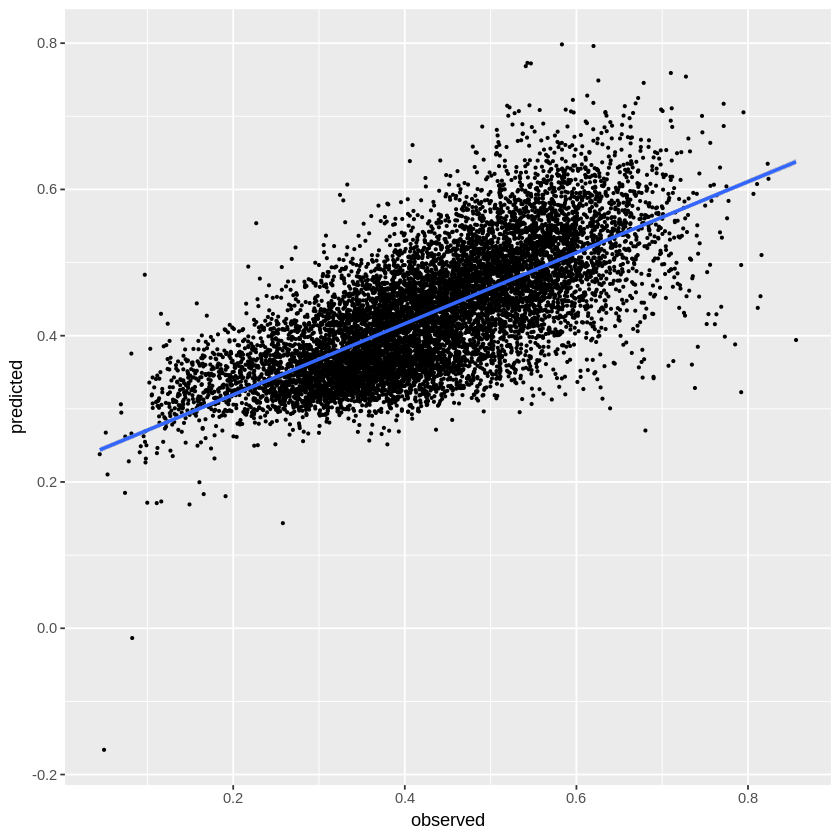

In [44]:
#ggsave(plot = p1, file = "output.png")
#ggsave(plot = p1, file = snakemake@output[["lasso_ridge_plot_summed"]])
print(p1)

In [45]:
summed_corr = cor(res_lasso_pred$observed, res_lasso_pred$predicted)

In [46]:
print("Correlation between the observed ATAC values and predicted ATAC values for the summed_controls")
print(summed_corr)

[1] "Correlation between the observed ATAC values and predicted ATAC values for the summed_controls"
[1] 0.7034615


### Predictions for all individuals

In [47]:
#all_individuals = readRDS("../data/cases_controls/cases_controls_rds_format/all_samples_normalized_CONTROLS.rds")

all_individuals = readRDS("../data/data_rds_format/all_samples_normalized_sliding_mean.rds")

In [48]:
head(all_individuals)

sample,bin,X30,X31,X32,X33,X34,X35,X36,X37,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
PGDX10344P1,chr10_400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_401,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_402,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PGDX10344P1,chr10_403,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#ATAC = read.table("../data/ATACseq_250kb_bins.txt")
ATAC = read.table("../data/ATACseq_250kb_bins.txt", header = FALSE)
colnames(ATAC) = c("bin", "ATAC_val")
ATAC$ATAC_val <- as.character(ATAC$ATAC_val)
ATAC$ATAC_val <- as.numeric(ATAC$ATAC_val)
ATAC$bin <- as.character(ATAC$bin)
print(head(ATAC))
print(str(ATAC))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

        bin   ATAC_val
1    chr1_0 0.05376791
2   chr10_0 0.29698782
3   chr10_1 0.40893151
4  chr10_10 0.30582283
5 chr10_100 0.59316570
6 chr10_101 0.47641373
'data.frame':	11515 obs. of  2 variables:
 $ bin     : chr  "chr1_0" "chr10_0" "chr10_1" "chr10_10" ...
 $ ATAC_val: num  0.0538 0.297 0.4089 0.3058 0.5932 ...
NULL


In [50]:
head(ATAC)

bin,ATAC_val
chr1_0,0.05376791
chr10_0,0.29698782
chr10_1,0.40893151
chr10_10,0.30582283
chr10_100,0.59316570
chr10_101,0.47641373


In [51]:
all_individuals_ATAC <- inner_join(all_individuals, ATAC, by ="bin") 

In [52]:
head(all_individuals_ATAC)

sample,bin,X30,X31,X32,X33,X34,X35,X36,X37,...,X692,X693,X694,X695,X696,X697,X698,X699,X700,ATAC_val
PGDX10344P1,chr10_400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.5866651
PGDX10344P1,chr10_40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.1996134
PGDX10344P1,chr10_4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.5968816
PGDX10344P1,chr10_401,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2905764
PGDX10344P1,chr10_402,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2319729
PGDX10344P1,chr10_403,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2262170


In [53]:
testdata <- all_individuals %>% select(-sample) %>% select(-bin)
#testdata <- Matrix(as.data.frame(testdata), sparse = TRUE)
n_rows_testdata <- dim(testdata)[1]
print("The number of rows in test data")
print(n_rows_testdata)

testdata1 <- testdata[1:round(n_rows_testdata/2), ]
testdata2 <- testdata[(round(n_rows_testdata/2)+1):n_rows_testdata, ]

print("N rows in testdata1")
print(dim(testdata1))
print("N rows in testdata2")
print(dim(testdata2))

testdata1 <- testdata1 %>% as.matrix()
testdata2 <- testdata2 %>% as.matrix()

[1] "The number of rows in test data"
[1] 4873319
[1] "N rows in testdata1"
[1] 2436660     671
[1] "N rows in testdata2"
[1] 2436659     671


In [54]:
tmp1       <- predict(lasso_cv, newx = testdata1, alpha = alpha_method, s="lambda.min")
#tmp1       <- predict(fit, s=lambda_cv, newx = testdata1)
tmp1 <- as.data.frame(tmp1)
tmp1 <- tibble(tmp1)

tmp2       <- predict(lasso_cv, newx = testdata2, alpha = alpha_method, s="lambda.min")
#tmp2       <- predict(fit, s=lambda_cv, newx = testdata2)
tmp2 <- as.data.frame(tmp2)
tmp2 <- tibble(tmp2)

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

In [55]:
tmp <- rbind(tmp1, tmp2)
print("Head and dimensions of the predictions for all individuals")
print(head(tmp))
print(dim(tmp))

[1] "Head and dimensions of the predictions for all individuals"
# A tibble: 6 × 1
       `1`
     <dbl>
1 -0.168  
2  0.537  
3 -0.0188 
4  0.00661
5 -0.697  
6 -0.0613 
[1] 4873319       1


In [56]:
data <- cbind(tmp, tibble(ATAC_val = all_individuals_ATAC$ATAC_val))
colnames(data) <- c("predicted", "observed")


In [57]:
print("Head of the predictions and observations for all individuals")
print(head(data))
print(str(data))

[1] "Head of the predictions and observations for all individuals"
     predicted  observed
1 -0.167637666 0.5866651
2  0.536599099 0.1996134
3 -0.018842515 0.5968816
4  0.006610673 0.2905764
5 -0.696909728 0.2319729
6 -0.061288854 0.2262170
'data.frame':	4873319 obs. of  2 variables:
 $ predicted: num  -0.16764 0.5366 -0.01884 0.00661 -0.69691 ...
 $ observed : num  0.587 0.2 0.597 0.291 0.232 ...
NULL


In [58]:
print("Correlation between the observed ATAC values and predicted ATAC values for all individuals")
individual_corr <- cor(data$predicted, data$observed)
print(individual_corr)

[1] "Correlation between the observed ATAC values and predicted ATAC values for all individuals"
[1] 0.1287897


In [59]:
p2 <- ggplot(data, aes(x = observed, y = predicted)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

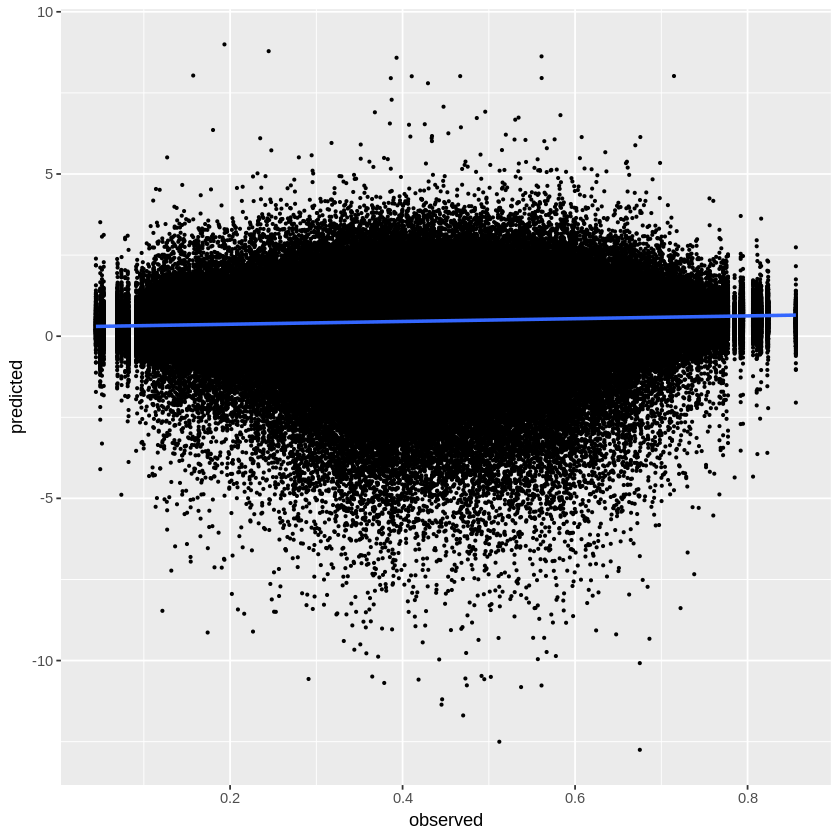

In [32]:
#ggsave(plot = p2, file = "output.png")
#ggsave(plot = p2, file = snakemake@output[["lasso_ridge_plot_individual"]])
print(p2)

In [60]:
correlations <- rbind(tibble(cor = summed_corr), tibble(cor = individual_corr)) 
rownames(correlations) <- c("summed controls", "all_samples")

Warning message:
“Setting row names on a tibble is deprecated.”

In [61]:
print("Correlations on both summed_controls and all_samples")
print(correlations)

[1] "Correlations on both summed_controls and all_samples"
# A tibble: 2 × 1
    cor
* <dbl>
1 0.703
2 0.129


In [72]:
#write.csv(correlations, "lasso_ridge_corr")

In [ ]:
write.csv(correlations, snakemake@output[["lasso_ridge_corr"]]